### Multiclass Logistic Regression on Cardiotocography dataset for Fetal state (Normal, Suspect, Pathological)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
from sklearn import metrics

In [40]:
data = pd.read_excel("CTG.xls","Raw Data")
data = data[1:-3]
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [41]:
# Dividing dataset into train and test set 75% data into training set, rest into test set
ind = np.random.rand(len(data)) < 0.75
train = data[ind]
test = data[~ind]

In [42]:
# Train set
X = train[['LBE','LB','AC','FM','UC','ASTV','MSTV','ALTV','MLTV','DL','DS','DP','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']]
Y = train['NSP']
X.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


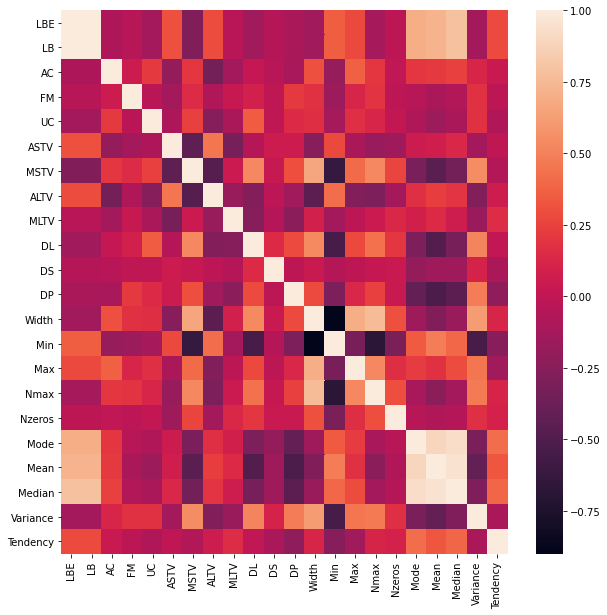

In [43]:
corr_mat = X.corr()
fig = plt.figure(figsize = (10, 10))
sns.heatmap(corr_mat)
plt.show()

In [44]:
corr_features_set = set()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i,j]) > 0.75 or abs(corr_mat.iloc[i,j]) < -0.75:
            corr_features_set.add(corr_mat.columns[i])
print("Number of Heavily Correlated Features are ", len(corr_features_set))
X.head()
print("These Features are, \n", corr_features_set)
print("These Features will be dropped")
X.drop(labels = corr_features_set, axis = 1, inplace = True)

Number of Heavily Correlated Features are  5
These Features are, 
 {'LB', 'Mean', 'Median', 'Min', 'Nmax'}
These Features will be dropped


<Figure size 720x720 with 0 Axes>

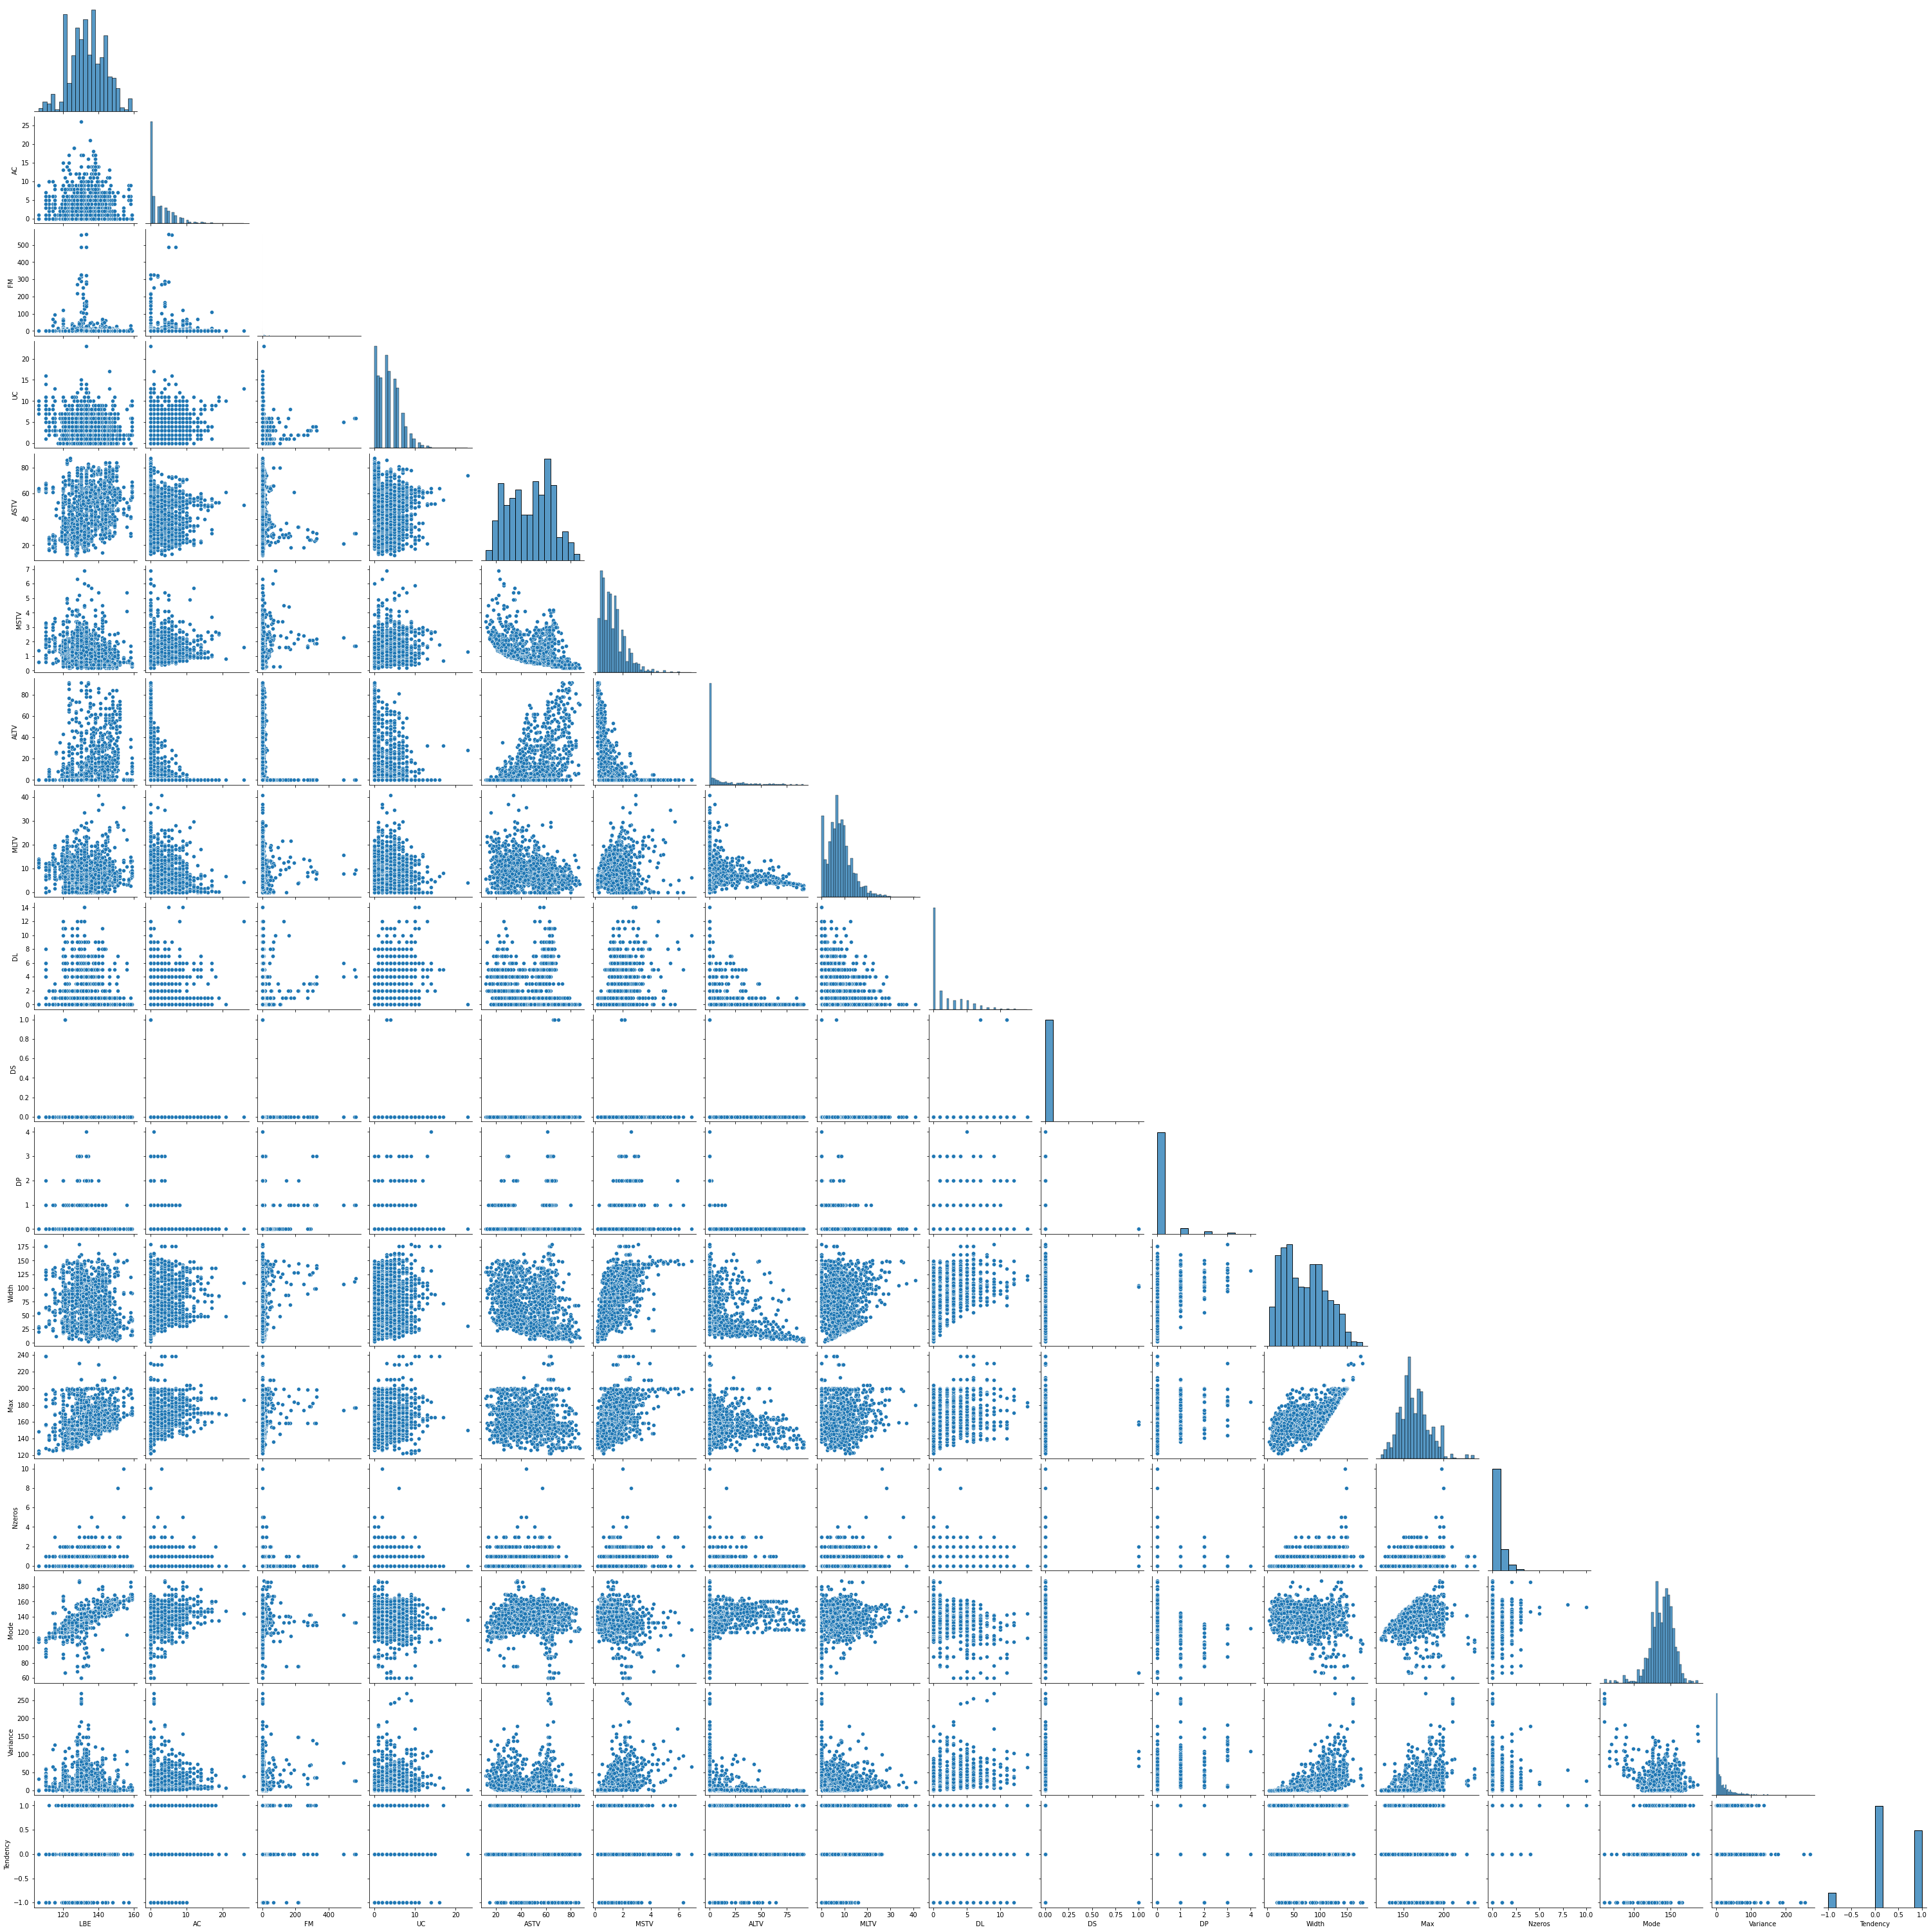

In [46]:
fig = plt.figure(figsize = (10, 10))
sns.pairplot(X, corner = True)
plt.show()

In [8]:
Y_class = Y.to_numpy().T
X = X.to_numpy()
N,p = X.shape
print("Size of training set is",X.shape)

Size of training set is (1564, 17)


In [9]:
# Test set
Xt = test[['LBE','LB','AC','FM','UC','ASTV','MSTV','ALTV','MLTV','DL','DS','DP','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']]
Yt = test['NSP']

# correlation analysis
Xt.drop(labels = corr_features_set, axis = 1, inplace = True)

In [10]:
Yt_class = Yt.to_numpy().T
Xt = Xt.to_numpy()
print("Size of test set is",len(Yt_class))

Size of test set is 562


In [11]:
# One Hot Encoding for y 1=[1 0 0 ] 2=[0 1 0] 3=[0 0 1]
y_one_hot = pd.get_dummies(Y)
y = y_one_hot.to_numpy()

In [12]:
ones = np.asmatrix(np.ones(len(X))).T
X = np.hstack((ones,X))
N,p = X.shape

In [13]:
# Standardization of training set
#for i in range(1,p):
#    X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])
#    X[:,i] = (X[:,i] - np.mean(X[:,i]))/(np.max(X[:,1]) - np.min(X[:,1]))

In [14]:
mean_and_maxmin = {}
for i in range(1,p):
    mean_and_maxmin["mean"+str(i)] = np.mean(X[:,i])
    mean_and_maxmin["maxmin"+str(i)] = np.max(X[:,i]) - np.min(X[:,i])
# Now standardizing the training set
for i in range(1,p):
    X[:,i] = (X[:,i] - mean_and_maxmin["mean"+str(i)])/mean_and_maxmin["maxmin"+str(i)]


In [15]:
# function to calculate (W*X)
def W_x_X(X, W):
    return (X.dot(W))

In [16]:
# Softmax function, substracted by max to remove nan values
def softmax(a):
    a_max = np.max(a, axis=-1)
    exp_a = np.exp(a - a_max)
    return exp_a / np.sum(exp_a, axis=-1)

In [17]:
# For labelling on predicton, gives one to maximum probability column
def classlabel(z):
    return z.argmax(axis=1)

In [18]:
# Cross Entropy Function
def crossEntropy(y_pred, y):
    return - np.sum(np.multiply(np.log(y_pred),(y)),axis=0)

In [19]:
# Calculates Cost
def cost(y_pred,y):
    return np.mean(crossEntropy(y_pred,y))

In [20]:
# Calculates Gradient of Cost
def gradCost(y_pred,y,X):
    return X.T @ (y_pred - y)

In [21]:
# Initializing Weight Matrix of size (p,k)   where p = number of features and k = number of classes
#W = np.random.random(size=(23,3))
W = np.random.randint(-10,10,size=(p,3))
#W = np.zeros((23,3))

In [22]:
inp = W_x_X(X,W)
y_pred = softmax(inp)
crossentropy = crossEntropy(y_pred,y)
J = cost(y_pred,y)
grad = gradCost(y_pred,y,X)
W = W - 0.01*(grad)

In [23]:
# Applying Gradient Descent 
iterations = 800
alpha = 0.001
Jj = []
for i in range(iterations):
    inp = W_x_X(X,W)
    y_pred = softmax(inp)
    #print(y_pred,"\n\n\n")
    crossentropy = crossEntropy(y_pred,y)
    J = cost(y_pred,y)
    Jj.append(J)
    grad = gradCost(y_pred,y,X)
    W = W - alpha*(grad)
    #print(W,"\n\n\n")
print("The weights after Gradient Descent are \n\n",W)

The weights after Gradient Descent are 

 [[  4.7235454    0.73171866  -1.45526406]
 [  0.82637559   6.49073925   3.68288516]
 [ 10.05858881  -2.44725644  -1.61133236]
 [ -1.6435255   -5.53322452  -4.82324998]
 [  3.42367013  -1.92228474  -2.50138539]
 [-10.60300724  -5.43681026   0.03981749]
 [ -7.68104229 -10.97327798  -4.34567973]
 [ -3.63832608  -0.18580249   1.82412857]
 [  1.61114978   9.07060596   0.31824426]
 [  1.73629848   5.33400161  -0.07030008]
 [  4.95367948  -8.9797893   -1.97389018]
 [ -3.67508694   7.89609077   6.77899617]
 [  1.2734704    0.36558588   7.36094372]
 [  4.28140944   3.84995066  -6.1313601 ]
 [ -0.06050361  -2.60254585  -3.33695054]
 [ -1.24039908  -0.07981926  -0.67978166]
 [ -9.21414414  -7.24862399   6.46276814]
 [ -5.50123427  -6.10690141  -9.39186432]]


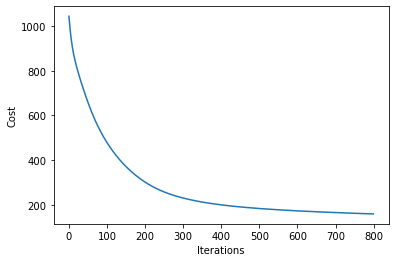

In [24]:
# Plotting cost
plt.plot(Jj)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [25]:
k = 101
print("Actual Label: ", y[k],"\tPredicted:",softmax(W_x_X(X[k],W)))

Actual Label:  [1 0 0] 	Predicted: [[9.74631372e-01 2.51307522e-02 2.37875524e-04]]


In [26]:
# Assigning labels to one hot encoding results
y_pred_classes = np.zeros((len(X),1))
for i in range(len(X)):
    a = y_pred[i,0]
    b = y_pred[i,1]
    c = y_pred[i,2]
    if (a>b):
        if(a>c):
            y_pred_classes[i]=1
        else:
            y_pred_classes[i]=3
    else:
        if(b>c):
            y_pred_classes[i]=2
        else:
            y_pred_classes[i]=3

In [27]:
# Calculating misclassifications on Training set
count = 0
for i in range(len(Y_class)):
    if y_pred_classes[i]!=Y_class[i]:
        count = count + 1
        #print(i,"\t",y_pred_classes[i],"\t",Y_class[i])
print("Total ",count," out of ",len(X),"are misclassified giving accuracy of",100*((len(X)-count)/len(X))," on training set")

Total  177  out of  1564 are misclassified giving accuracy of 88.68286445012788  on training set


In [28]:
# Calculations on test set
# adding ones column
ones = np.asmatrix(np.ones(len(Xt))).T
Xt = np.hstack((ones,Xt))

# Standardization of test set
#for i in range(1,p):
#    Xt[:,i] = (Xt[:,i] - np.mean(Xt[:,i]))/np.std(Xt[:,i])
# Now standardizing the training set
for i in range(1,p):
    Xt[:,i] = (Xt[:,i] - mean_and_maxmin["mean"+str(i)])/mean_and_maxmin["maxmin"+str(i)]


inpt = W_x_X(Xt,W)
y_pred_t = softmax(inpt)

In [29]:
# Assigning labels to one hot encoding results of test set
y_pred_classes_test = np.zeros((len(Xt),1))
for i in range(len(Xt)):
    a = y_pred_t[i,0]
    b = y_pred_t[i,1]
    c = y_pred_t[i,2]
    if (a>b):
        if(a>c):
            y_pred_classes_test[i]=1
        else:
            y_pred_classes_test[i]=3
    else:
        if(b>c):
            y_pred_classes_test[i]=2
        else:
            y_pred_classes_test[i]=3

In [30]:
# Calculating misclassifications on Test set
count_t = 0
for i in range(len(Yt_class)):
    if y_pred_classes_test[i]!=Yt_class[i]:
        count_t = count_t + 1
        #print(i,"\t",y_pred_classes[i],"\t",Y_class[i])
print("Total ",count_t," out of ",len(Xt),"are misclassified giving accuracy of",100*((len(Xt)-count_t)/len(Xt))," on test set")

Total  72  out of  562 are misclassified giving accuracy of 87.18861209964413  on test set


In [31]:
print("Recall is : (actual positive cases which we predicted correctly)\n",metrics.recall_score(y_pred_classes_test,Yt_class, average = None))

Recall is : (actual positive cases which we predicted correctly)
 [0.91814159 0.63636364 0.75      ]


In [32]:
print("Precision is : (share of positive cases which are predicted correctly)",metrics.precision_score(y_pred_classes_test,Yt_class, average = None))

Precision is : (share of positive cases which are predicted correctly) [0.95183486 0.525      0.7173913 ]


In [33]:
print("The Confusion Matrix is \n",metrics.confusion_matrix(y_pred_classes_test,Yt_class))

The Confusion Matrix is 
 [[415  32   5]
 [ 16  42   8]
 [  5   6  33]]


In [34]:
print("The Multilabel confusion matrix is\n",metrics.multilabel_confusion_matrix(y_pred_classes_test,Yt_class))

The Multilabel confusion matrix is
 [[[ 89  21]
  [ 37 415]]

 [[458  38]
  [ 24  42]]

 [[505  13]
  [ 11  33]]]


In [35]:
print("The F1 Score is\n",metrics.f1_score(y_pred_classes_test,Yt_class , average = None))

The F1 Score is
 [0.93468468 0.57534247 0.73333333]
